In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# open the csvs with pandas
unm = pd.read_csv(r"E:\Git_repos\UNM-EPS_diversity\UNM.csv")
eps = pd.read_csv(r"E:\Git_repos\UNM-EPS_diversity\UNM_eps.csv")

# fill na with 0
unm = unm.replace("-", 0)
eps = eps.replace("-", 0);

# convert columns to integers
unm[unm.columns[1:]] = unm[unm.columns[1:]].astype(int)
eps[eps.columns[1:]] = eps[eps.columns[1:]].astype(int)

# reorder the column
unm = unm.reindex(sorted(unm.columns), axis=1)
eps = eps.reindex(sorted(eps.columns), axis=1)

In [10]:
# preview
print(unm.shape)
unm.head()

(9, 24)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Demographic
0,1032,1066,1090,1057,1145,1188,1203,1330,1410,1414,...,1743,1933,1989,2283,2350,2448,2574,2717,2751,Hispanic or Latino
1,347,339,324,353,356,314,334,349,409,393,...,397,378,457,458,425,479,515,533,546,"American Indian or Alaska Native, non-Hispanic"
2,98,105,127,109,138,134,152,162,148,139,...,191,174,198,196,181,183,207,240,251,"Asian, non-Hispanic"
3,75,84,91,93,89,74,80,90,92,93,...,105,137,111,119,119,124,128,110,123,"Black or African American, non-Hispanic"
4,0,0,0,0,0,0,0,0,0,0,...,6,8,9,10,9,13,8,10,7,"Native Hawaiian or Other Pacific Islander, non..."


In [11]:
print(eps.shape)
eps.head()

(9, 24)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Demographic
0,3,2,4,3,3,1,2,0,1,2,...,4,5,3,6,4,2,3,10,7,Hispanic or Latino
1,0,1,0,0,2,0,0,0,1,1,...,1,1,0,2,0,2,0,0,0,"American Indian or Alaska Native, non-Hispanic"
2,0,0,1,0,1,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,"Asian, non-Hispanic"
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Black or African American, non-Hispanic"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Native Hawaiian or Other Pacific Islander, non..."


In [13]:
# convert to arrays
unm_arr = unm[unm.columns[:-1]].to_numpy()
eps_arr = eps[eps.columns[:-1]].to_numpy()

In [14]:
# convert to percentages
unm_per = unm_arr / unm_arr.sum(axis=0).astype(float) * 100 
eps_per = eps_arr / eps_arr.sum(axis=0).astype(float) * 100 

In [15]:
# get the date range from the columns names
x = unm.columns[:-1]
unm_y = unm_per
eps_y = eps_per

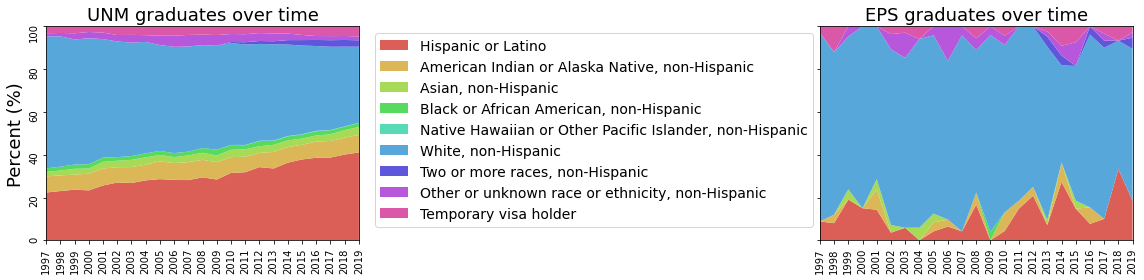

In [65]:
# set up the figure
fig = plt.figure(figsize=(16, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=2, sharey=True)

# get the color palette
col = sns.color_palette("hls", len(unm_y))

# plot the UNM data
ax[0].stackplot(x, unm_y, colors = col)
ax[0].set_title("UNM graduates over time", size='18')
ax[0].set_ylabel('Percent (%)', size ='18')
ax[0].margins(0, 0)
ax[0].tick_params(labelrotation=90)

# plot the EPS data
ax[1].stackplot(x, eps_y, colors = col)
ax[1].set_title("EPS graduates over time", fontsize='18')
ax[1].margins(0, 0)
ax[1].tick_params(labelrotation=90)

# set the legend
plt.legend(unm.iloc[:,-1], bbox_to_anchor = (0, 1), prop={'size': 14})

# save and show
plt.savefig(r"E:\Git_repos\UNM-EPS_diversity\time_series.png", dpi=300, facecolor='white')
plt.show()